## Assignment 5 : K Mean Clustering
### Name : Atharv Subhekar
### CWID : 20015840

In [9]:
# Importing required libraries
import numpy as np
import gzip
import struct
import pandas as pd
import random
import time
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

### 2D Data Generalization and Visualization

In [10]:
#np.random.seed(seed = 695)
sample1 = np.random.normal([1,1], 1, [100,2])
sample2 = np.random.normal([5,5],1,[100,2])

In [11]:
data = np.concatenate((sample1,sample2))

In [12]:
data.shape

(200, 2)

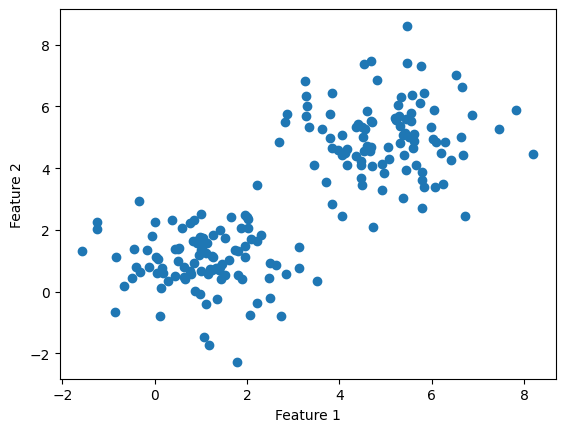

In [13]:
# Plot the generated data
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(data[:,0], data[:, 1])
#plt.scatter(data[100:199, 0], data[100:199, 1], label='Class 2')

### Helper Funciton and Initialization

In [14]:
def euclidean(point1, point2):
  dist = np.sum(np.square(point1-point2))
  return (np.sqrt(dist))

In [15]:
def initialize_centroid(data, k = 2):
  #np.random.seed(seed=695)
  centroid_list = []
  for _ in range(k):
    cent = np.random.randint(data.shape[0])
    centroid_list.append(data[cent])
  return np.array(centroid_list)

In [16]:
data.shape[0]

200

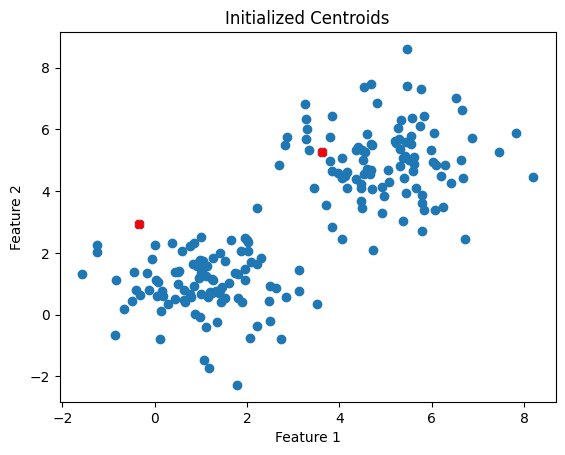

In [39]:
centroids = initialize_centroid(data, k = 2)

# Plot the generated data
plt.title('Initialized Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(data[:,0], data[:, 1])
for i in centroids:
  plt.scatter(i[0],i[1], marker='X', color = 'red')

### K-Means Implementation

In [26]:
def closest_centroid(x, centroids):
  centroid_distance = []
  for k in centroids:
    # Calculating distance for each point to the centroid
    dist = euclidean(x, k)
    centroid_distance.append(dist)
  # Storing the index of the centroid with the smallest distance
  closest_centroid_index = min(range(len(centroid_distance)), key = lambda x:centroid_distance[x])
  return closest_centroid_index


In [27]:
def assign_cluster(data, centroids):
  assigned_cluster = [0] * len(data)
  for i in range(len(data)):
    # Getting the centroid index for each datapoint
    closest_centroid_index =  closest_centroid(data[i], centroids)
    # Storing each data point's cluster
    assigned_cluster[i]=closest_centroid_index
  return assigned_cluster


In [28]:
def update_centroids(data, assigned_cluster, centroids):
  cent_list = []
  for c in range(len(centroids)):
    # Storing cluster data with respect to the number of centroids
    cluster_data = np.array([data[i] for i in range(len(data)) if assigned_cluster[i]==c])
    # Updating the centroids
    new_centroid = [0] * len(centroids[0])
    # Calculating the mean of assigned points in the cluster
    new_centroid = cluster_data.mean(axis=0)
    cent_list.append(new_centroid)
  return np.array(cent_list)


In [47]:
def K_means(data, centroids, epochs = 10):
  # Creating an empty array for storing old centroids
  old_centroids = np.random.rand(len(centroids),len(centroids[0]))
  #old_centroids = np.ones(shape=(len(centroids),len(centroids[0])))
  for i in range(epochs):
    # Updating the centroids
    assigned_cluster = assign_cluster(data, centroids)
    old_centroids = np.array(centroids)
    centroids = update_centroids(data, assigned_cluster, centroids)
    print("epoch",i+1)
    # Creating a stopping condition for the K means to converge
    if np.array_equal(old_centroids, centroids):
      break
  return centroids

In [41]:
# Trying the implementation on the generated 2D dataset.
centroids = initialize_centroid(data, k = 2)
centroids = K_means(data, centroids, epochs = 100)
centroids

epoch 1
epoch 2
epoch 3
epoch 4
breaking loop


array([[1.0448271 , 1.02339352],
       [5.03278898, 5.00030708]])

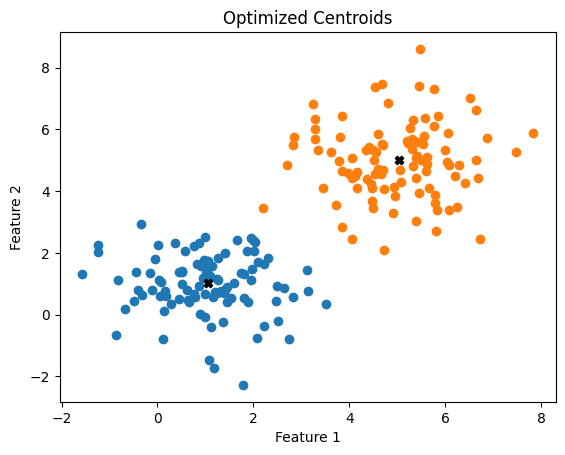

In [42]:
# Plot the final outcome of the best centroids
plt.title('Optimized Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter(data[:99, 0], data[:99, 1], label='Feature 1')
plt.scatter(data[100:199, 0], data[100:199, 1], label='Feature 2')
for i in centroids:
  plt.scatter(i[0],i[1], marker='X', color = 'black')

### Training K-means model on MNIST dataset

In [32]:
# Function for loading image files as dataset
def read_idx(filename):
  with gzip.open(filename, 'rb') as f:
    zero, data_type, dims = struct.unpack('>HBB', f.read(4))
    shape = tuple(struct.unpack('>I', f.read(4)) [0] for d in range(dims))
    return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [34]:
# Loading the dataset
X_test = read_idx('t10k-images-idx3-ubyte.gz')
y_test = read_idx('t10k-labels-idx1-ubyte.gz')
X_train = read_idx('train-images-idx3-ubyte.gz')
y_train = read_idx('train-labels-idx1-ubyte.gz')
# Data Statistics
print('Shape of training samples =',X_train.shape)
print('Shape of training labels =',y_train.shape)
print('Shape of testing samples =',X_test.shape)
print('Shape of testing labels =',y_test.shape)

Shape of training samples = (60000, 28, 28)
Shape of training labels = (60000,)
Shape of testing samples = (10000, 28, 28)
Shape of testing labels = (10000,)


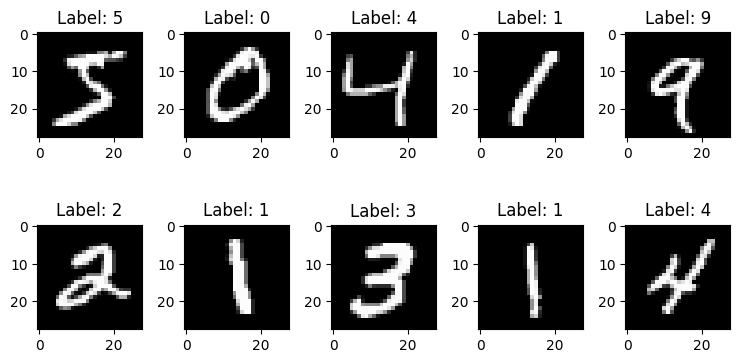

In [35]:
# Printing the first 10 images
images = X_train[:10]
labels = y_train[:10]
num_rows = 2
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(1.5*num_cols,2*num_rows))
for i in range(10):
    ax = axes[i//num_cols, i%num_cols]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [36]:
def normalize(samples):
  normalized = []
  for image in samples:
    processed_image = np.zeros((image.shape[0],image.shape[1]))
    for i in range(image.shape[0]):
      for j in range(image.shape[1]):
        processed_image[i,j] = image[i,j]/255 ## Dividing every pixel value by 255 as the image is grayscale and max value is 255
    normalized.append(processed_image)
  return np.asarray(normalized)


In [37]:
# Normalizing data
normalized_X_train = normalize(X_train)
normalized_X_test = normalize(X_test)

In [43]:
# Reshaping the data
train_data = normalized_X_train.reshape(normalized_X_train.shape[0], 784)
test_data = normalized_X_test.reshape(normalized_X_test.shape[0], 784)

In [48]:
# Trying the implementation on MNIST dataset.
start_time = time.time()
centroids = initialize_centroid(train_data, k = 10)
print(centroids.shape)
centroids = K_means(train_data, centroids, epochs = 100)
print("--- %s seconds ---" % (time.time() - start_time))

(10, 784)
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49
epoch 50
epoch 51
epoch 52
epoch 53
epoch 54
epoch 55
epoch 56
epoch 57
epoch 58
epoch 59
epoch 60
epoch 61
epoch 62
epoch 63
epoch 64
epoch 65
epoch 66
epoch 67
epoch 68
epoch 69
epoch 70
epoch 71
epoch 72
epoch 73
epoch 74
epoch 75
epoch 76
epoch 77
epoch 78
--- 563.1553328037262 seconds ---


Time required for classic K mean implementation is around 10 minutes.

### Experimental Section
To visualize performance of K means on MNIST dataset, I reduced the dimensions from 784 to 2 and performed K means.

In [49]:
# Performing PCA to reduce the 784 dimensional data to 2 dimensional data.
pca = PCA(n_components=2)
new_train = pca.fit_transform(train_data)
new_train.shape

(60000, 2)

In [50]:
new_train

array([[ 0.48600556, -1.22613464],
       [ 3.96752608, -1.15631124],
       [-0.20333862,  1.5379758 ],
       ...,
       [-0.69825275,  0.6277742 ],
       [ 0.51219083, -0.02197211],
       [-0.6801448 , -0.09691707]])

In [51]:
# Trying the implementation on MNIST dataset.
start_time = time.time()
centroids = initialize_centroid(new_train, k = 10)
centroids = K_means(new_train, centroids, epochs=100)
print("--- %s seconds ---" % (time.time() - start_time))

epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49
epoch 50
epoch 51
epoch 52
epoch 53
epoch 54
epoch 55
epoch 56
epoch 57
epoch 58
epoch 59
epoch 60
epoch 61
epoch 62
epoch 63
epoch 64
epoch 65
epoch 66
epoch 67
epoch 68
epoch 69
epoch 70
epoch 71
epoch 72
epoch 73
epoch 74
epoch 75
epoch 76
epoch 77
epoch 78
epoch 79
epoch 80
epoch 81
epoch 82
epoch 83
epoch 84
epoch 85
epoch 86
epoch 87
epoch 88
epoch 89
epoch 90
epoch 91
epoch 92
epoch 93
--- 570.7436468601227 seconds ---


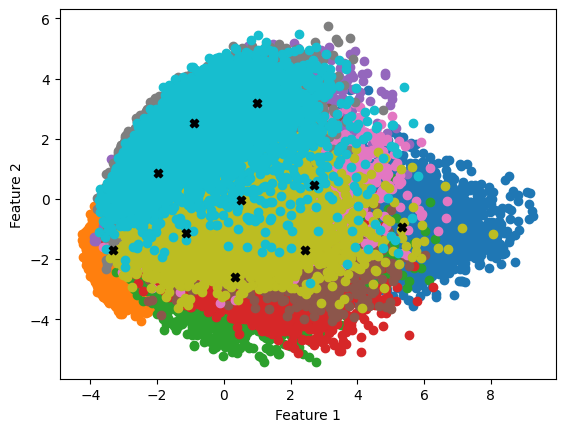

In [52]:
# Plot the final outcome of the best centroids
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
for l in range(10):
  labeled_data = np.array([new_train[i] for i in range(new_train.shape[0]) if y_train[i]==l])
  plt.scatter(labeled_data[:,0],labeled_data[:,1])
for i in centroids:
  plt.scatter(i[0],i[1], marker='X', color = 'black')

### Mini Batch K-Means on MNIST dataset

In [53]:
k_values = [10,16,64,256]
inertia = []
for i in k_values:
  start_time = time.time()
  model = MiniBatchKMeans(n_clusters=i, random_state=0, batch_size=128, max_iter=100, init_size=i, compute_labels = False )
  kmeans = model.fit(train_data)
  inertia.append(kmeans.inertia_)
  print("--- %s seconds ---" % (time.time() - start_time))
best = min(inertia)
best_index = inertia.index(best)
print("Inertia of best model = ",best)
print("Best value of k = ", k_values[best_index])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--- 0.7271487712860107 seconds ---


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--- 2.075526237487793 seconds ---


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--- 2.8423819541931152 seconds ---


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


--- 3.8442399501800537 seconds ---
Inertia of best model =  1538204.0737912855
Best value of k =  256


In [54]:
# Applying the best model on training data
model = MiniBatchKMeans(n_clusters=256, random_state=0, batch_size=128, max_iter=100, init_size=256, compute_labels = False )
k_means_test = model.fit(test_data)
print("Inertia of model on test set = ", k_means_test.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia of model on test set =  250823.84081906854


### Conclusion
K Means classic implementation is very slow depending on the size of the data where the computations take a lot longer. Hence we used scikit learn implementation of Kmeans which was considerably faster and efficient.
Based on inertia we evaluated the performance of the model. Smaller the inertia value, better is the model performance. In this case, the best value of k=256.
The final inertia using the best k on test set was 250823.